In [31]:
from scipy.sparse import dok_matrix
import networkx as nx
import numpy as np

In [30]:
num_agents = 10
steps = 100

In [33]:
A_social = dok_matrix((num_agents, num_agents))

In [34]:
for i in range(steps):
    a, b = np.random.randint(0, 10, 2)
    A_social[a, b] += 1
    A_social[b, a] += 1

In [35]:
G = nx.from_scipy_sparse_array(A_social)
print(G.edges)
print(G.nodes)

[(0, 3), (0, 5), (0, 1), (0, 8), (0, 6), (0, 2), (0, 7), (0, 0), (0, 9), (1, 7), (1, 4), (1, 8), (1, 5), (1, 3), (1, 9), (1, 6), (2, 6), (2, 5), (2, 8), (2, 4), (2, 7), (2, 2), (2, 9), (2, 3), (3, 9), (3, 6), (3, 7), (3, 5), (3, 3), (3, 4), (4, 9), (4, 6), (4, 5), (4, 8), (5, 6), (5, 7), (5, 5), (5, 9), (5, 8), (6, 9), (6, 8), (6, 7), (7, 8), (7, 9), (7, 7), (8, 9)]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [55]:
sum([np.sum(A_social[agent]) for agent in range(num_agents)])

200.0

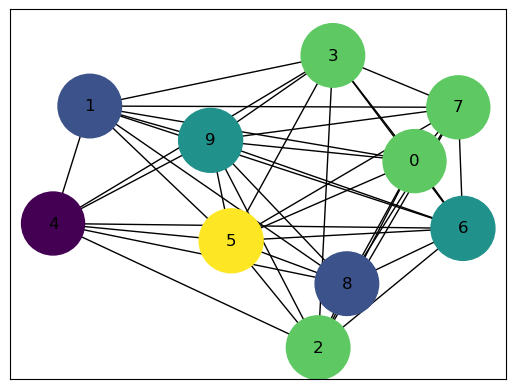

In [37]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )

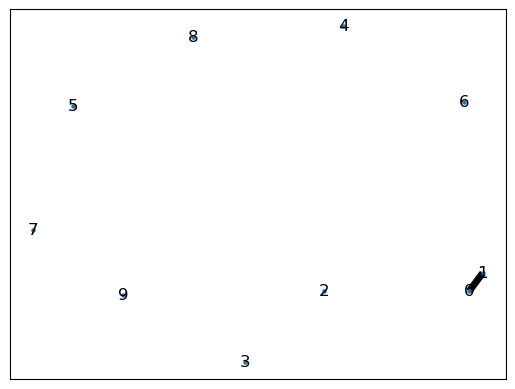

In [29]:
nx.draw_networkx(G,
                width=5,
                node_size=5,
                with_labels=True)

In [ ]:
with open('building.txt') as f:
    template = ''
    
    for line in f:
        if 'building' in line:
            line = line.split('>')[-2].split('<')[-2].strip()
            if line != 'building' and line != '': 
                print(f'{line}:\n  key: building\n  value: {line}\n  general:\n  color:\n\n')

In [4]:
import yaml
with open('building.yaml') as f:
    building_yaml = yaml.safe_load(f)

for k, v in building_yaml.items():
    if v['color'] == 'orange':
        v['general'] = 'sleep'
    elif v['color'] == 'blue':
        v['general'] = 'work'
    elif v['color'] == 'purple':
        v['general'] = 'social'
    else:
        v['general'] = 'other'

with open('building.yaml', 'w') as f:
    yaml.dump(building_yaml, f)
    

In [6]:
%load_ext autoreload
%autoreload 2

from trans_infra.trans_infra.model import TransInfraNetworkModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
model = TransInfraNetworkModel(100, "./east_yaml.osm")

In [8]:
G = model.G_trans

In [15]:
b_types = set()
for n in model.nodes:
    b_types.add(n[1]['building'])
b_types

{'apartments',
 'church',
 'detached',
 'dormitory',
 'garage',
 'grandstand',
 'house',
 'retail',
 'roof',
 'school',
 'shed',
 'street',
 'university',
 'yes'}

## Split sim into days of 48 timesteps, each representing 30 min
sleep target -> 16 
work target -> 16
social target -> ?
misc -> ? (catch-all?)

In [11]:
for _ in range(10):
    model.step()

In [110]:
for a in model.space.get_all_cell_contents():
        print(a.path)

[819]
